In [3]:
!pip install tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# divide the dataset  into independent and dependent features
x=dataset.iloc[:,3:13] #[i,j];i->which rows to be included(: meams all rows,j->which columns to be included(x:y represencts range of columns))
y=dataset.iloc[:,13]

In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
## feature engineering,
# categorical feature conversion
geography = pd.get_dummies(x['Geography'],drop_first='True').astype(int)
gender=pd.get_dummies(x['Gender'],drop_first='True').astype(int)


,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [18]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [19]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [24]:
#droping existing variable
x=x.drop(['Geography','Gender'],axis=1)

KeyError: "['Geography', 'Gender'] not found in axis"

In [35]:
#updating nexly create categoricla features
x=pd.concat([x,gender,geography],axis=1)

In [36]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
7389,667,34,5,0.00,2,1,0,163830.64,0,0,1
9275,427,42,1,75681.52,1,1,1,57098.00,1,1,0
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,1,0,1
356,850,57,8,126776.30,2,1,1,132298.49,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,0,1,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,0,1
3264,738,35,5,161274.05,2,1,0,181429.87,1,0,0
9845,590,38,9,0.00,2,1,1,148750.16,0,0,1


In [38]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [39]:
x_train.shape

(8000, 11)

# Tensorflow


In [42]:
#creating the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


Sequential-> a block consisting neural network, we can do forward and backward propagation       
Dense-> we can create input,hidden,output layers  
LU's-> all the activation functions  
DropOut-> layer to regularization to reduce overfitting, gives us the percentage dead nodes in each layer. **Sequential-> a block consisting neural network, we can do forward and backward propagation       
Dense-> we can create input,hidden,output layers  
LU's-> all the activation functions  
DropOut-> layer to regularization to reduce overfitting, gives us the percentage dead nodes in each layer. **


In [43]:
classifier = Sequential()

In [44]:
#adding the input Layer
classifier.add(Dense(units=11,activation='relu'))

In [46]:

#first hidden layer
classifier.add(Dense(units=7,activation='relu'))


In [47]:
#second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [48]:
classifier.add(Dense(1,activation='sigmoid'))

In [51]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [54]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [57]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3269 - accuracy: 0.8636 - val_loss: 0.3755 - val_accuracy: 0.8519
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3231 - accuracy: 0.8651 - val_loss: 0.3665 - val_accuracy: 0.8463
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3222 - accuracy: 0.8673 - val_loss: 0.3796 - val_accuracy: 0.8527
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3233 - accuracy: 0.8628 - val_loss: 0.3751 - val_accuracy: 0.8497
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3203 - accuracy: 0.8681 - val_loss: 0.3668 - val_accuracy: 0.8542
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3227 - accuracy: 0.8640 - val_loss: 0.3709 - val_accuracy: 0.8448
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3221 - accuracy: 0.8671 - val_loss: 0.3888 - val_accuracy:

In [59]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

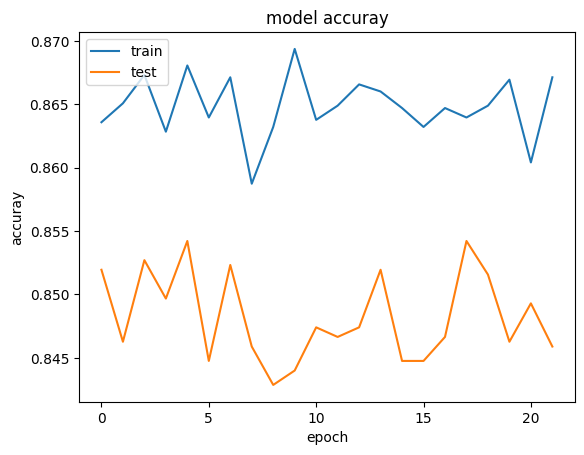

In [62]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuray')
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [63]:
#prediction
y_pred= classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1535,   60],
       [ 222,  183]])

In [66]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.859

In [67]:
#get the weights
classifier.get_weights()

[array([[-7.02807546e-01,  3.69005591e-01, -1.52296817e+00,
         -3.26869369e-01,  6.47011161e-01, -4.60658848e-01,
          1.05132513e-01,  4.38107610e-01,  7.57300854e-01,
         -7.44247288e-02, -4.87440735e-01],
        [-1.38516617e+00,  3.53646970e+00, -6.04849756e-01,
         -1.01952612e+00, -8.11766446e-01, -2.89270902e+00,
          2.34104037e+00, -3.89810348e+00, -2.05590081e+00,
          1.28378832e+00, -3.33222270e+00],
        [ 2.64419854e-01,  1.62368560e+00,  4.88906205e-01,
         -6.77542686e-02,  1.40662694e+00, -3.55913520e-01,
         -1.39422715e+00,  8.88055384e-01,  2.34596040e-02,
         -1.34525406e+00,  3.75506245e-02],
        [-1.72549582e+00,  3.11501622e-01, -7.76583672e-01,
          1.10269523e+00, -3.33302903e+00,  7.34418273e-01,
          3.89177871e+00, -1.24219686e-01,  2.62999105e+00,
         -7.60295570e-01,  7.81717896e-01],
        [ 3.06913781e+00,  2.05671120e+00,  1.37287164e+00,
          4.26696682e+00,  4.02298927e+00,  